In [19]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime, timedelta
import backtrader as bt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyfolio as pf
import quantstats
import math
import seaborn
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

In [2]:
# XLY (Consumer Discretionary), XLP (Consumer Staples), XLF (Financial), XLE (Energy), XLV (Health Care), XLI (Industrial)
# XLB (Materials), XLK (Technology), XLU (Utilities)
# SHY (1-3 year treasury: cash)

# shy starts: 2002-07-30
start = datetime(2002,8,1)
end = datetime(2021,5,31)

tickers = ['XLB','XLE','XLF','XLI','XLK','XLP','XLU','XLV','XLY','SHY']

def get_price_data(tickers):
    df_sector = pd.DataFrame(columns=tickers)
    
    for ticker in tickers:
        df_sector[ticker] = pdr.get_data_yahoo(ticker, start, end)['Adj Close']  
         
    return df_sector

In [3]:
df_sector = get_price_data(tickers)
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY
Date,,,,,,,,,,
2002-07-31,13.538386,14.196311,12.657179,15.610104,11.063435,13.371263,10.526128,19.728098,19.041368,59.007946
2002-08-01,13.452792,13.359758,12.344178,15.263207,10.576707,13.245712,10.373425,19.177660,18.458864,59.124153
2002-08-02,12.886496,13.208796,12.031182,14.708185,10.352652,13.220597,10.169827,19.023533,17.640223,59.240341
2002-08-05,12.445313,12.718184,11.558938,14.222539,9.904553,13.038550,9.991673,18.208862,17.230904,59.334690
2002-08-06,12.972098,13.177356,11.937830,14.708185,10.321753,13.051109,10.403966,18.656561,17.742558,59.189507
...,...,...,...,...,...,...,...,...,...,...
2021-05-24,87.370003,52.680000,37.759998,103.680000,138.610001,71.230003,66.040001,124.480003,170.220001,86.288010
2021-05-25,86.629997,51.610001,37.380001,103.370003,138.649994,71.250000,65.239998,124.110001,170.759995,86.288010
2021-05-26,86.660004,52.070000,37.490002,103.699997,138.639999,71.099998,65.250000,123.389999,172.389999,86.307999


9개 섹터 중 12개월 누적 수익률 상위 5개 섹터를 동일 비중으로 가져가고, 누적 수익률이 -인 경우는 SHY etf로 대체합니다.

In [4]:
def get_momentum(x):
    temp = [0 for _ in range(len(x.index))]
    momentum = pd.Series(temp, index=x.index)
    
    try:
        before_12m = df_sector[x.name-timedelta(days=370):x.name-timedelta(days=365)].iloc[-1]
        momentum = x / before_12m - 1
        
    except:
        pass
    
    return momentum

In [5]:
momentum_col = [col + '_m' for col in df_sector.columns]
df_sector[momentum_col] = df_sector.apply(lambda x: get_momentum(x), axis=1)
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,XLB_m,XLE_m,XLF_m,XLI_m,XLK_m,XLP_m,XLU_m,XLV_m,XLY_m,SHY_m
Date,,,,,,,,,,,,,,,,,,,,
2002-07-31,13.538386,14.196311,12.657179,15.610104,11.063435,13.371263,10.526128,19.728098,19.041368,59.007946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002-08-01,13.452792,13.359758,12.344178,15.263207,10.576707,13.245712,10.373425,19.177660,18.458864,59.124153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002-08-02,12.886496,13.208796,12.031182,14.708185,10.352652,13.220597,10.169827,19.023533,17.640223,59.240341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002-08-05,12.445313,12.718184,11.558938,14.222539,9.904553,13.038550,9.991673,18.208862,17.230904,59.334690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002-08-06,12.972098,13.177356,11.937830,14.708185,10.321753,13.051109,10.403966,18.656561,17.742558,59.189507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,87.370003,52.680000,37.759998,103.680000,138.610001,71.230003,66.040001,124.480003,170.220001,86.288010,0.682965,0.443394,0.760269,0.649446,0.451031,0.273896,0.208169,0.269416,0.415237,0.001353
2021-05-25,86.629997,51.610001,37.380001,103.370003,138.649994,71.250000,65.239998,124.110001,170.759995,86.288010,0.668710,0.414077,0.742554,0.644514,0.451450,0.274254,0.193534,0.265643,0.419726,0.001353
2021-05-26,86.660004,52.070000,37.490002,103.699997,138.639999,71.099998,65.250000,123.389999,172.389999,86.307999,0.624778,0.388083,0.661283,0.583297,0.452851,0.264749,0.185948,0.260579,0.410932,0.001585


모멘텀 데이터가 구해진 구간에서만 해야 합니다. 넉넉하게 2003년 9월부터로 합니다. 월말 리밸런싱을 가정하여 월말 데이터만 뽑을 것입니다.

In [6]:
df_sector = df_sector.loc[df_sector.index >= '2003-09-01']
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,XLB_m,XLE_m,XLF_m,XLI_m,XLK_m,XLP_m,XLU_m,XLV_m,XLY_m,SHY_m
Date,,,,,,,,,,,,,,,,,,,,
2003-09-02,15.675874,15.949609,14.443469,17.174885,14.594810,13.280826,11.393372,20.984875,23.290251,60.545948,0.164111,0.106830,0.120231,0.117627,0.330342,-0.014628,0.041108,0.053515,0.187309,0.021664
2003-09-03,15.682619,15.956034,14.471502,17.315781,14.749743,13.312909,11.430570,20.903135,23.282331,60.590282,0.199814,0.153077,0.180209,0.167377,0.414177,0.009859,0.073979,0.095002,0.230865,0.019995
2003-09-04,15.541031,15.930345,14.409845,17.301693,14.889193,13.377061,11.435885,20.955162,23.353628,60.671680,0.184210,0.153843,0.153485,0.155082,0.384475,0.006577,0.081200,0.064972,0.211939,0.021741
2003-09-05,15.480347,15.859716,14.342584,17.111485,14.811721,13.235914,11.414631,20.903135,23.123890,60.878826,0.212436,0.146638,0.165520,0.162850,0.425399,-0.003573,0.082316,0.074755,0.222488,0.024101
2003-09-08,15.615194,16.078033,14.482710,17.196020,15.082846,13.274407,11.499658,21.274691,23.131823,60.804867,0.198884,0.143698,0.159318,0.153906,0.404500,-0.000675,0.090378,0.093859,0.185895,0.024863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,87.370003,52.680000,37.759998,103.680000,138.610001,71.230003,66.040001,124.480003,170.220001,86.288010,0.682965,0.443394,0.760269,0.649446,0.451031,0.273896,0.208169,0.269416,0.415237,0.001353
2021-05-25,86.629997,51.610001,37.380001,103.370003,138.649994,71.250000,65.239998,124.110001,170.759995,86.288010,0.668710,0.414077,0.742554,0.644514,0.451450,0.274254,0.193534,0.265643,0.419726,0.001353
2021-05-26,86.660004,52.070000,37.490002,103.699997,138.639999,71.099998,65.250000,123.389999,172.389999,86.307999,0.624778,0.388083,0.661283,0.583297,0.452851,0.264749,0.185948,0.260579,0.410932,0.001585


In [7]:
df_sector = df_sector.resample(rule='M').last()
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,XLB_m,XLE_m,XLF_m,XLI_m,XLK_m,XLP_m,XLU_m,XLV_m,XLY_m,SHY_m
Date,,,,,,,,,,,,,,,,,,,,
2003-09-30,14.795932,15.520121,14.317087,16.465275,14.161002,13.081612,11.742328,20.726589,21.877050,61.204376,0.262647,0.159783,0.254630,0.211224,0.549396,0.046216,0.220763,0.109258,0.224424,0.025187
2003-10-31,16.205723,15.668549,15.308742,17.483309,15.199060,13.673891,11.822752,20.868189,23.868029,60.954796,0.308261,0.149684,0.229142,0.225826,0.332856,0.052628,0.258101,0.055298,0.251398,0.018522
2003-11-30,16.571718,15.791162,15.252403,17.829716,15.415970,13.834840,11.849562,21.315365,24.082193,60.918385,0.220937,0.126278,0.170652,0.185293,0.160100,0.088849,0.230594,0.041464,0.195446,0.022362
2003-12-31,18.196249,17.858601,15.944183,19.011400,15.899339,14.080931,12.625952,22.548845,25.046740,61.580399,0.374128,0.258117,0.304918,0.318576,0.386755,0.111733,0.264659,0.149301,0.372001,0.022204
2004-01-31,17.391766,18.260498,16.465641,19.203211,16.578060,14.080931,12.885720,23.169601,24.903564,61.655003,0.397179,0.346110,0.391883,0.431284,0.478930,0.181031,0.336749,0.208711,0.423282,0.023939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,70.342949,38.907192,28.822254,84.509895,128.574844,63.745312,61.689369,114.632141,161.753036,86.304970,0.225154,-0.239690,-0.029353,0.041759,0.331888,0.031193,-0.070859,0.156782,0.310609,0.025973
2021-02-28,73.240715,47.644489,32.167427,90.331978,130.330002,62.959564,57.927460,112.220512,160.894394,86.254997,0.410367,0.133454,0.212918,0.242024,0.508937,0.100085,-0.060249,0.221042,0.397808,0.018839
2021-03-31,78.800003,49.060001,34.049999,98.449997,132.809998,68.309998,64.040001,116.739998,168.070007,86.207031,0.783784,0.779943,0.671183,0.694440,0.669173,0.288959,0.194204,0.338860,0.727183,0.002123


9개 섹터 중 모멘텀이 좋은 5개 섹터를 선택합니다. 선택된 5개 섹터는 동일 비중으로 투자합니다. 모멘텀이 음수이거나 SHY보다 못하면 SHY로 대체합니다.

In [8]:
def select_sector(x):
    selected_sector = pd.Series([0,0,0,0,0,0,0,0,0,0], index=['SECTOR1','PRICE1','SECTOR2','PRICE2','SECTOR3','PRICE3','SECTOR4','PRICE4','SECTOR5','PRICE5'])
    
    momentum1 = None
    momentum2 = None
    momentum3 = None
    momentum4 = None
    momentum5 = None
    
    sorted_momentum = x[['XLB_m','XLE_m','XLF_m','XLI_m','XLK_m','XLP_m','XLU_m','XLV_m','XLY_m','SHY_m']].sort_values(ascending=False)
    
    # SHY가 가장 좋을 경우
    if x['SHY_m'] == sorted_momentum[0]:
        momentum1 = sorted_momentum[0]
        momentum2 = sorted_momentum[0]
        momentum3 = sorted_momentum[0]
        momentum4 = sorted_momentum[0]
        momentum5 = sorted_momentum[0]

        selected_sector['SECTOR1'] = x[x==momentum1].index[0][:3]
        selected_sector['PRICE1'] = x[selected_sector['SECTOR1']]
        selected_sector['SECTOR2'] = x[x==momentum2].index[0][:3]
        selected_sector['PRICE2'] = x[selected_sector['SECTOR2']]
        selected_sector['SECTOR3'] = x[x==momentum3].index[0][:3]
        selected_sector['PRICE3'] = x[selected_sector['SECTOR3']]
        selected_sector['SECTOR4'] = x[x==momentum4].index[0][:3]
        selected_sector['PRICE4'] = x[selected_sector['SECTOR4']]
        selected_sector['SECTOR5'] = x[x==momentum5].index[0][:3]
        selected_sector['PRICE5'] = x[selected_sector['SECTOR5']]
        
    # SHY가 두번째 좋을 경우
    if x['SHY_m'] == sorted_momentum[1]:
        momentum1 = sorted_momentum[0]
        momentum2 = sorted_momentum[1]
        momentum3 = sorted_momentum[1]
        momentum4 = sorted_momentum[1]
        momentum5 = sorted_momentum[1]

        selected_sector['SECTOR1'] = x[x==momentum1].index[0][:3]
        selected_sector['PRICE1'] = x[selected_sector['SECTOR1']]
        selected_sector['SECTOR2'] = x[x==momentum2].index[0][:3]
        selected_sector['PRICE2'] = x[selected_sector['SECTOR2']]
        selected_sector['SECTOR3'] = x[x==momentum3].index[0][:3]
        selected_sector['PRICE3'] = x[selected_sector['SECTOR3']]
        selected_sector['SECTOR4'] = x[x==momentum4].index[0][:3]
        selected_sector['PRICE4'] = x[selected_sector['SECTOR4']]
        selected_sector['SECTOR5'] = x[x==momentum5].index[0][:3]
        selected_sector['PRICE5'] = x[selected_sector['SECTOR5']]
        
    # SHY가 세번째 좋을 경우
    if x['SHY_m'] == sorted_momentum[2]:
        momentum1 = sorted_momentum[0]
        momentum2 = sorted_momentum[1]
        momentum3 = sorted_momentum[2]
        momentum4 = sorted_momentum[2]
        momentum5 = sorted_momentum[2]

        selected_sector['SECTOR1'] = x[x==momentum1].index[0][:3]
        selected_sector['PRICE1'] = x[selected_sector['SECTOR1']]
        selected_sector['SECTOR2'] = x[x==momentum2].index[0][:3]
        selected_sector['PRICE2'] = x[selected_sector['SECTOR2']]
        selected_sector['SECTOR3'] = x[x==momentum3].index[0][:3]
        selected_sector['PRICE3'] = x[selected_sector['SECTOR3']]
        selected_sector['SECTOR4'] = x[x==momentum4].index[0][:3]
        selected_sector['PRICE4'] = x[selected_sector['SECTOR4']]
        selected_sector['SECTOR5'] = x[x==momentum5].index[0][:3]
        selected_sector['PRICE5'] = x[selected_sector['SECTOR5']]
        
    # SHY가 네번째 좋을 경우
    if x['SHY_m'] == sorted_momentum[3]:
        momentum1 = sorted_momentum[0]
        momentum2 = sorted_momentum[1]
        momentum3 = sorted_momentum[2]
        momentum4 = sorted_momentum[3]
        momentum5 = sorted_momentum[3]

        selected_sector['SECTOR1'] = x[x==momentum1].index[0][:3]
        selected_sector['PRICE1'] = x[selected_sector['SECTOR1']]
        selected_sector['SECTOR2'] = x[x==momentum2].index[0][:3]
        selected_sector['PRICE2'] = x[selected_sector['SECTOR2']]
        selected_sector['SECTOR3'] = x[x==momentum3].index[0][:3]
        selected_sector['PRICE3'] = x[selected_sector['SECTOR3']]
        selected_sector['SECTOR4'] = x[x==momentum4].index[0][:3]
        selected_sector['PRICE4'] = x[selected_sector['SECTOR4']]
        selected_sector['SECTOR5'] = x[x==momentum5].index[0][:3]
        selected_sector['PRICE5'] = x[selected_sector['SECTOR5']]
        
    # SHY가 다섯번째 이하일 경우
    else:
        momentum1 = sorted_momentum[0]
        momentum2 = sorted_momentum[1]
        momentum3 = sorted_momentum[2]
        momentum4 = sorted_momentum[3]
        momentum5 = sorted_momentum[4]

        selected_sector['SECTOR1'] = x[x==momentum1].index[0][:3]
        selected_sector['PRICE1'] = x[selected_sector['SECTOR1']]
        selected_sector['SECTOR2'] = x[x==momentum2].index[0][:3]
        selected_sector['PRICE2'] = x[selected_sector['SECTOR2']]
        selected_sector['SECTOR3'] = x[x==momentum3].index[0][:3]
        selected_sector['PRICE3'] = x[selected_sector['SECTOR3']]
        selected_sector['SECTOR4'] = x[x==momentum4].index[0][:3]
        selected_sector['PRICE4'] = x[selected_sector['SECTOR4']]
        selected_sector['SECTOR5'] = x[x==momentum5].index[0][:3]
        selected_sector['PRICE5'] = x[selected_sector['SECTOR5']]

    return selected_sector

In [9]:
df_sector[['SECTOR1','PRICE1','SECTOR2','PRICE2','SECTOR3','PRICE3','SECTOR4','PRICE4','SECTOR5','PRICE5']] = df_sector.apply(lambda x: select_sector(x), axis=1) 
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,...,SECTOR1,PRICE1,SECTOR2,PRICE2,SECTOR3,PRICE3,SECTOR4,PRICE4,SECTOR5,PRICE5
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-30,14.795932,15.520121,14.317087,16.465275,14.161002,13.081612,11.742328,20.726589,21.877050,61.204376,...,XLK,14.161002,XLB,14.795932,XLF,14.317087,XLY,21.877050,XLU,11.742328
2003-10-31,16.205723,15.668549,15.308742,17.483309,15.199060,13.673891,11.822752,20.868189,23.868029,60.954796,...,XLK,15.199060,XLB,16.205723,XLU,11.822752,XLY,23.868029,XLF,15.308742
2003-11-30,16.571718,15.791162,15.252403,17.829716,15.415970,13.834840,11.849562,21.315365,24.082193,60.918385,...,XLU,11.849562,XLB,16.571718,XLY,24.082193,XLI,17.829716,XLF,15.252403
2003-12-31,18.196249,17.858601,15.944183,19.011400,15.899339,14.080931,12.625952,22.548845,25.046740,61.580399,...,XLK,15.899339,XLB,18.196249,XLY,25.046740,XLI,19.011400,XLF,15.944183
2004-01-31,17.391766,18.260498,16.465641,19.203211,16.578060,14.080931,12.885720,23.169601,24.903564,61.655003,...,XLK,16.578060,XLI,19.203211,XLY,24.903564,XLB,17.391766,XLF,16.465641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,70.342949,38.907192,28.822254,84.509895,128.574844,63.745312,61.689369,114.632141,161.753036,86.304970,...,XLK,128.574844,XLY,161.753036,XLB,70.342949,XLV,114.632141,XLI,84.509895
2021-02-28,73.240715,47.644489,32.167427,90.331978,130.330002,62.959564,57.927460,112.220512,160.894394,86.254997,...,XLK,130.330002,XLB,73.240715,XLY,160.894394,XLI,90.331978,XLV,112.220512
2021-03-31,78.800003,49.060001,34.049999,98.449997,132.809998,68.309998,64.040001,116.739998,168.070007,86.207031,...,XLB,78.800003,XLE,49.060001,XLY,168.070007,XLI,98.449997,XLF,34.049999


각각의 수익률을 계산합니다.

In [10]:
return_col = [ticker + '_r' for ticker in tickers]
df_sector[return_col] = df_sector[tickers].pct_change()
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,...,XLB_r,XLE_r,XLF_r,XLI_r,XLK_r,XLP_r,XLU_r,XLV_r,XLY_r,SHY_r
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-30,14.795932,15.520121,14.317087,16.465275,14.161002,13.081612,11.742328,20.726589,21.877050,61.204376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-31,16.205723,15.668549,15.308742,17.483309,15.199060,13.673891,11.822752,20.868189,23.868029,60.954796,...,0.095282,0.009564,0.069264,0.061829,0.073304,0.045276,0.006849,0.006832,0.091008,-0.004078
2003-11-30,16.571718,15.791162,15.252403,17.829716,15.415970,13.834840,11.849562,21.315365,24.082193,60.918385,...,0.022584,0.007825,-0.003680,0.019814,0.014271,0.011771,0.002268,0.021429,0.008973,-0.000597
2003-12-31,18.196249,17.858601,15.944183,19.011400,15.899339,14.080931,12.625952,22.548845,25.046740,61.580399,...,0.098030,0.130924,0.045355,0.066276,0.031355,0.017788,0.065521,0.057868,0.040052,0.010867
2004-01-31,17.391766,18.260498,16.465641,19.203211,16.578060,14.080931,12.885720,23.169601,24.903564,61.655003,...,-0.044211,0.022504,0.032705,0.010089,0.042689,0.000000,0.020574,0.027529,-0.005716,0.001211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,70.342949,38.907192,28.822254,84.509895,128.574844,63.745312,61.689369,114.632141,161.753036,86.304970,...,-0.024175,0.037467,-0.017978,-0.042688,-0.008383,-0.049815,-0.008772,0.014016,0.007650,0.000232
2021-02-28,73.240715,47.644489,32.167427,90.331978,130.330002,62.959564,57.927460,112.220512,160.894394,86.254997,...,0.041195,0.224568,0.116062,0.068892,0.013651,-0.012326,-0.060981,-0.021038,-0.005308,-0.000579
2021-03-31,78.800003,49.060001,34.049999,98.449997,132.809998,68.309998,64.040001,116.739998,168.070007,86.207031,...,0.075904,0.029710,0.058524,0.089869,0.019029,0.084982,0.105521,0.040273,0.044598,-0.000556


섹터 로테이션 전략의 월별 수익률을 구합니다. 

In [11]:
df_sector[df_sector.iloc[1-1]['SECTOR1']+'_r'].iloc[1]

0.07330401261724195

In [12]:
df_sector['RETURN'] = 0
df_sector['RETURN_ACC'] = 0
df_sector['LOG_RETURN'] = 0
df_sector['LOG_RETURN_ACC'] = 0

for i in range(len(df_sector)):
    strat_return = 0
    log_strat_return = 0
    
    # 직전 달 모멘텀이 좋은 것으로 리밸런싱해서 앞으로 한 달 가져가는 것
    if i > 0:
        strat_return = (df_sector[df_sector.iloc[i-1]['SECTOR1']+'_r'].iloc[i]+df_sector[df_sector.iloc[i-1]['SECTOR2']+'_r'].iloc[i]+df_sector[df_sector.iloc[i-1]['SECTOR3']+'_r'].iloc[i]+df_sector[df_sector.iloc[i-1]['SECTOR4']+'_r'].iloc[i]+df_sector[df_sector.iloc[i-1]['SECTOR5']+'_r'].iloc[i])/5
        log_strat_return = math.log(strat_return + 1)
        
    df_sector.loc[df_sector.index[i], 'RETURN'] = strat_return
    # 누적 = 직전 누적 * 현재
    df_sector.loc[df_sector.index[i], 'RETURN_ACC'] = (1+df_sector.loc[df_sector.index[i-1], 'RETURN_ACC'])*(1+strat_return)-1
    df_sector.loc[df_sector.index[i], 'LOG_RETURN'] = log_strat_return
    # 로그누적 = 직전 로그누적 + 현재 로그
    df_sector.loc[df_sector.index[i], 'LOG_RETURN_ACC'] = df_sector.loc[df_sector.index[i-1], 'LOG_RETURN_ACC'] + log_strat_return
    
# 수익률 * 100
df_sector[['RETURN','RETURN_ACC','LOG_RETURN','LOG_RETURN_ACC']] = df_sector[['RETURN','RETURN_ACC','LOG_RETURN','LOG_RETURN_ACC']]*100
df_sector[return_col] = df_sector[return_col] * 100

In [13]:
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,...,XLK_r,XLP_r,XLU_r,XLV_r,XLY_r,SHY_r,RETURN,RETURN_ACC,LOG_RETURN,LOG_RETURN_ACC
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-30,14.795932,15.520121,14.317087,16.465275,14.161002,13.081612,11.742328,20.726589,21.877050,61.204376,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2003-10-31,16.205723,15.668549,15.308742,17.483309,15.199060,13.673891,11.822752,20.868189,23.868029,60.954796,...,7.330401,4.527572,0.684909,0.683179,9.100762,-0.407782,6.714135,6.714135,6.498344,6.498344
2003-11-30,16.571718,15.791162,15.252403,17.829716,15.415970,13.834840,11.849562,21.315365,24.082193,60.918385,...,1.427124,1.177052,0.226764,2.142860,0.897287,-0.059735,0.888319,7.662097,0.884396,7.382740
2003-12-31,18.196249,17.858601,15.944183,19.011400,15.899339,14.080931,12.625952,22.548845,25.046740,61.580399,...,3.135507,1.778777,6.552057,5.786814,4.005226,1.086723,6.304695,14.449864,6.113927,13.496667
2004-01-31,17.391766,18.260498,16.465641,19.203211,16.578060,14.080931,12.885720,23.169601,24.903564,61.655003,...,4.268866,0.000000,2.057417,2.752940,-0.571632,0.121149,0.711106,15.263723,0.708589,14.205256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,70.342949,38.907192,28.822254,84.509895,128.574844,63.745312,61.689369,114.632141,161.753036,86.304970,...,-0.838339,-4.981469,-0.877195,1.401617,0.765016,0.023166,-1.071591,413.258151,-1.077374,163.560875
2021-02-28,73.240715,47.644489,32.167427,90.331978,130.330002,62.959564,57.927460,112.220512,160.894394,86.254997,...,1.365086,-1.232636,-6.098149,-2.103798,-0.530836,-0.057902,1.947834,423.255565,1.929106,165.489981
2021-03-31,78.800003,49.060001,34.049999,98.449997,132.809998,68.309998,64.040001,116.739998,168.070007,86.207031,...,1.902859,8.498206,10.552062,4.027326,4.459828,-0.055610,5.393464,451.477164,5.253043,170.743024


In [14]:
# MDD

df_sector['BALANCE'] = (1+df_sector['RETURN']/100).cumprod()
df_sector['DRAWDOWN'] = -(df_sector['BALANCE'].cummax() - df_sector['BALANCE']) / df_sector['BALANCE'].cummax()

df_sector[['BALANCE','DRAWDOWN']] = df_sector[['BALANCE','DRAWDOWN']] * 100
df_sector

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,SHY,...,XLU_r,XLV_r,XLY_r,SHY_r,RETURN,RETURN_ACC,LOG_RETURN,LOG_RETURN_ACC,BALANCE,DRAWDOWN
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-30,14.795932,15.520121,14.317087,16.465275,14.161002,13.081612,11.742328,20.726589,21.877050,61.204376,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,100.000000,-0.000000
2003-10-31,16.205723,15.668549,15.308742,17.483309,15.199060,13.673891,11.822752,20.868189,23.868029,60.954796,...,0.684909,0.683179,9.100762,-0.407782,6.714135,6.714135,6.498344,6.498344,106.714135,-0.000000
2003-11-30,16.571718,15.791162,15.252403,17.829716,15.415970,13.834840,11.849562,21.315365,24.082193,60.918385,...,0.226764,2.142860,0.897287,-0.059735,0.888319,7.662097,0.884396,7.382740,107.662097,-0.000000
2003-12-31,18.196249,17.858601,15.944183,19.011400,15.899339,14.080931,12.625952,22.548845,25.046740,61.580399,...,6.552057,5.786814,4.005226,1.086723,6.304695,14.449864,6.113927,13.496667,114.449864,-0.000000
2004-01-31,17.391766,18.260498,16.465641,19.203211,16.578060,14.080931,12.885720,23.169601,24.903564,61.655003,...,2.057417,2.752940,-0.571632,0.121149,0.711106,15.263723,0.708589,14.205256,115.263723,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,70.342949,38.907192,28.822254,84.509895,128.574844,63.745312,61.689369,114.632141,161.753036,86.304970,...,-0.877195,1.401617,0.765016,0.023166,-1.071591,413.258151,-1.077374,163.560875,513.258151,-1.071591
2021-02-28,73.240715,47.644489,32.167427,90.331978,130.330002,62.959564,57.927460,112.220512,160.894394,86.254997,...,-6.098149,-2.103798,-0.530836,-0.057902,1.947834,423.255565,1.929106,165.489981,523.255565,-0.000000
2021-03-31,78.800003,49.060001,34.049999,98.449997,132.809998,68.309998,64.040001,116.739998,168.070007,86.207031,...,10.552062,4.027326,4.459828,-0.055610,5.393464,451.477164,5.253043,170.743024,551.477164,-0.000000


기본적인 성과 분석 지표를 직접 구해봅니다. 

In [36]:
total_month = len(df_sector)
profit_month = len(df_sector[df_sector['RETURN'] >= 0])
loss_month = len(df_sector[df_sector['RETURN'] < 0])
win_rate = profit_month / total_month * 100
CAGR = ((1+df_sector['RETURN_ACC'][-1]/100)**(1/(total_month/12)))-1
STDEV = np.std(df_sector['RETURN'][1:])*math.sqrt(12)
RRR = CAGR * 100 / STDEV

print(total_month, "개월 중 수익 월 :", profit_month, "개월")
print(total_month, "개월 중 손실 월 :", loss_month, "개월")
print("승률 :", round(win_rate, 2))

print('CAGR : ', round(CAGR*100, 2))
print('MDD : ', round(df_sector['DRAWDOWN'].min(), 2))
print('STDEV :', round(STDEV, 2))
print('Return-Risk Ratio: ', round(RRR, 2))

213 개월 중 수익 월 : 147 개월
213 개월 중 손실 월 : 66 개월
승률 : 69.01
CAGR :  10.48
MDD :  -34.98
STDEV : 12.51
Return-Risk Ratio:  0.84


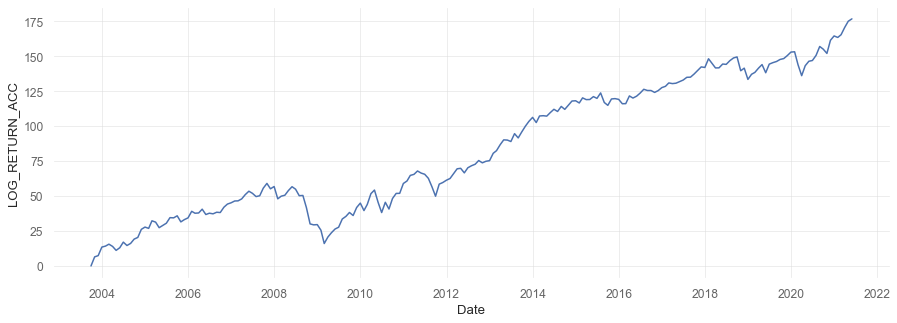

In [21]:
plt.figure(figsize=(15,5))
seaborn.lineplot(data=df_sector, x=df_sector.index, y=df_sector['LOG_RETURN_ACC'])

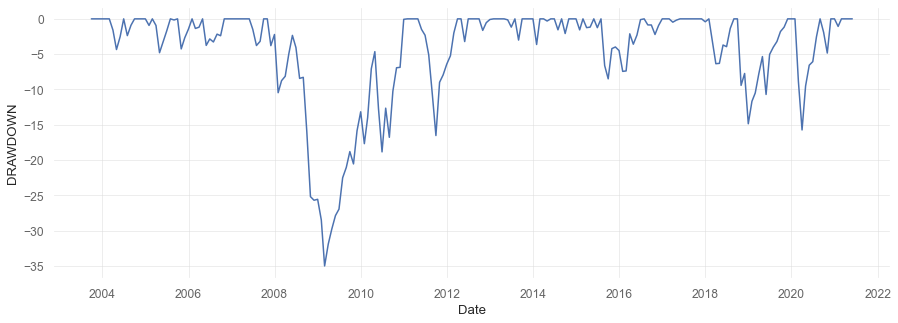

In [22]:
plt.figure(figsize=(15,5))
seaborn.lineplot(data=df_sector, x=df_sector.index, y=df_sector['DRAWDOWN'])

아래 그림의 샤프 비율은 월간 데이터로 구해진 것이라 왜곡되어 있습니다. 환산시킨 0.86이나 Return-Risk Ratio 0.84가 더 믿을 만 합니다. 

In [34]:
quantstats.stats.sharpe(df_sector['RETURN'])/math.sqrt(252/12)

0.8624672303343784

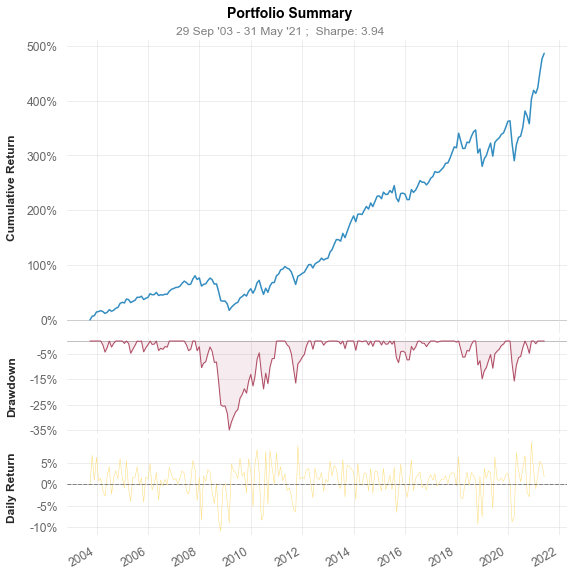

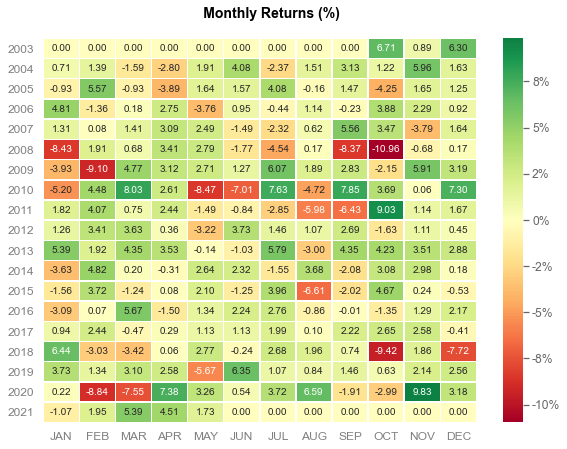

In [32]:
quantstats.reports.plots(df_sector['RETURN']/100, mode='basic')